In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nsblackK/wipro-hackathon/main/train.csv?token=GHSAT0AAAAAABQMLMZP5DS7C4TSSWISTJCGYPZMNSA'
df = pd.read_csv(url)

In [3]:
pip install seaborn


     |████████████████████████████████| 292 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.2 MB 81.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 55.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 76.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 73.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


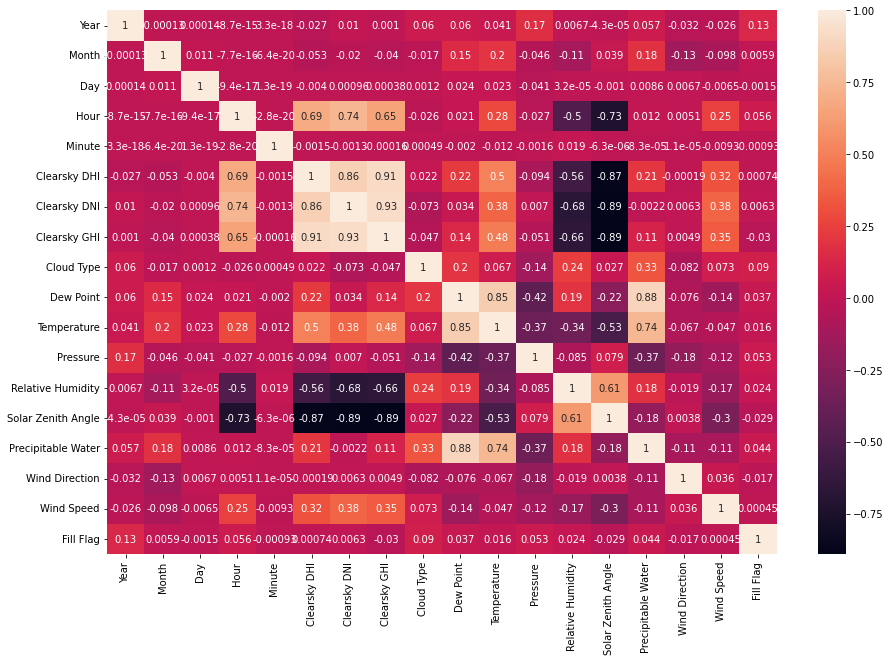

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
timeSeries=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df["timeSeries"]=timeSeries
df.index_col="timeSeries"
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,timeSeries
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


In [7]:
print(df.shape)
train=df.iloc[:-50000]
test=df.iloc[-50000:]
print(train.shape,test.shape)

(175296, 19)
(125296, 19) (50000, 19)


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Clearsky DHI'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218872.420, Time=52.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1357535.257, Time=2.92 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1220057.480, Time=3.63 sec


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Clearsky DHI'],order=(5,1,3))
model=model.fit()
model.summary()

In [ ]:
df['Clearsky DHI'].plot(figsize=(12,5))

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Clearsky DHI'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Clearsky DHI'].mean()
rmse=sqrt(mean_squared_error(pred,test['Clearsky DHI']))
print(rmse)